In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
def walk_through_files(dir_path):
    for dirpath,dirnames,filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
walk_through_files("/kaggle/input/asl-alphabet")

There are 2 directories and 0 images in /kaggle/input/asl-alphabet
There are 1 directories and 0 images in /kaggle/input/asl-alphabet/asl_alphabet_test
There are 0 directories and 28 images in /kaggle/input/asl-alphabet/asl_alphabet_test/asl_alphabet_test
There are 1 directories and 0 images in /kaggle/input/asl-alphabet/asl_alphabet_train
There are 29 directories and 0 images in /kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train
There are 0 directories and 3000 images in /kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/N
There are 0 directories and 3000 images in /kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/R
There are 0 directories and 3000 images in /kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/space
There are 0 directories and 3000 images in /kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/B
There are 0 directories and 3000 images in /kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/

In [3]:
!pip install split_folders

In [4]:
from pathlib import Path
data_path=Path("/kaggle/input")
train_dir=data_path/"asl-alphabet/asl_alphabet_train/asl_alphabet_train"

In [5]:
from PIL import Image
import matplotlib.pyplot as plt
import torch
from torch import nn
import torchvision
from torchvision import transforms,datasets
from torch.utils.data import DataLoader
from torchinfo import summary
import random

/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/E/E1058.jpg
E
200
200


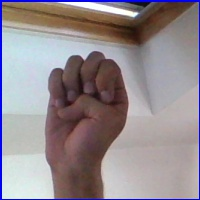

In [6]:
image_path_list=list(train_dir.glob("*/*.jpg"))
random_image_path=random.choice(image_path_list)

image_class=random_image_path.parent.stem
img=Image.open(random_image_path)


print(random_image_path)
print(image_class)
print(img.height)
print(img.width)
img

In [7]:
device="cuda:0" if torch.cuda.is_available() else "cpu"
device

'cuda:0'

In [8]:
os.chdir("/kaggle/working/")

In [9]:
import splitfolders
data_path=Path("/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train")
splitfolders.ratio(data_path,output="/kaggle/working/output",ratio=(0.8,0.2))

Copying files: 87000 files [06:39, 217.97 files/s]


In [10]:
train_transformations=transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor()
    
])

test_transformations=transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor()
])

In [11]:
walk_through_files("/kaggle/working/output")

There are 2 directories and 0 images in /kaggle/working/output
There are 29 directories and 0 images in /kaggle/working/output/train
There are 0 directories and 2400 images in /kaggle/working/output/train/A
There are 0 directories and 2400 images in /kaggle/working/output/train/H
There are 0 directories and 2400 images in /kaggle/working/output/train/U
There are 0 directories and 2400 images in /kaggle/working/output/train/B
There are 0 directories and 2400 images in /kaggle/working/output/train/L
There are 0 directories and 2400 images in /kaggle/working/output/train/S
There are 0 directories and 2400 images in /kaggle/working/output/train/K
There are 0 directories and 2400 images in /kaggle/working/output/train/V
There are 0 directories and 2400 images in /kaggle/working/output/train/R
There are 0 directories and 2400 images in /kaggle/working/output/train/I
There are 0 directories and 2400 images in /kaggle/working/output/train/G
There are 0 directories and 2400 images in /kaggle/wo

In [12]:
data_path=Path("/kaggle/working/output")
train_dir=Path("/kaggle/working/output/train")
test_dir=Path("/kaggle/working/output/val")

In [13]:
train_data=datasets.ImageFolder(root=train_dir,transform=train_transformations)
test_data=datasets.ImageFolder(root=test_dir,transform=test_transformations)

len(train_data),len(test_data)

(69600, 17400)

In [14]:
train_data,test_data

(Dataset ImageFolder
     Number of datapoints: 69600
     Root location: /kaggle/working/output/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 17400
     Root location: /kaggle/working/output/val
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                ToTensor()
            ))

Text(0.5, 1.0, '14')

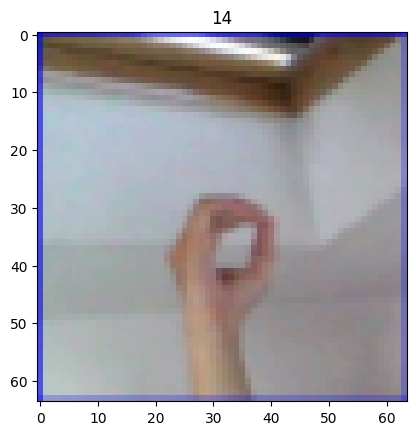

In [15]:
im,label=train_data[34000]
plt.imshow(im.permute(1,2,0))
plt.title(label)

In [16]:
train_data.classes,train_data.class_to_idx

(['A',
  'B',
  'C',
  'D',
  'E',
  'F',
  'G',
  'H',
  'I',
  'J',
  'K',
  'L',
  'M',
  'N',
  'O',
  'P',
  'Q',
  'R',
  'S',
  'T',
  'U',
  'V',
  'W',
  'X',
  'Y',
  'Z',
  'del',
  'nothing',
  'space'],
 {'A': 0,
  'B': 1,
  'C': 2,
  'D': 3,
  'E': 4,
  'F': 5,
  'G': 6,
  'H': 7,
  'I': 8,
  'J': 9,
  'K': 10,
  'L': 11,
  'M': 12,
  'N': 13,
  'O': 14,
  'P': 15,
  'Q': 16,
  'R': 17,
  'S': 18,
  'T': 19,
  'U': 20,
  'V': 21,
  'W': 22,
  'X': 23,
  'Y': 24,
  'Z': 25,
  'del': 26,
  'nothing': 27,
  'space': 28})

In [17]:
labels=train_data.classes

torch.Size([3, 64, 64])
Q


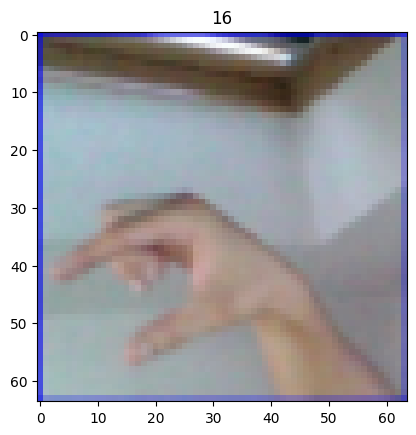

In [18]:
idx=torch.randint(0,len(train_data),size=[1]).item()
img,label=train_data[idx]
print(img.shape)
plt.imshow(img.permute(1,2,0))
plt.title(label)
print(labels[label])

In [19]:
batch_size=32
train_dataloader=DataLoader(dataset=train_data,batch_size=32,shuffle=True)
test_dataloader=DataLoader(dataset=test_data,batch_size=32,shuffle=True)

train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x788f096de770>,
 <torch.utils.data.dataloader.DataLoader at 0x788f096df430>)

In [20]:
len(train_dataloader),len(test_dataloader)

(2175, 544)

In [21]:
def train_step(model,dataloader,loss_fn,optimizer):
    model.train()
    
    train_loss,train_acc=0,0
    for batch,(x,y) in enumerate(dataloader):
        x,y=x.to(device),y.to(device)
        y_pred=model(x)
        loss=loss_fn(y_pred,y)
        optimizer.zero_grad()
        
        train_loss+=loss.item()
        
        loss.backward()
        optimizer.step()
        
        y_labels=torch.argmax(torch.softmax(y_pred,dim=1),dim=1)
        train_acc+=((y_labels==y).sum().item())/len(y)
        
    train_loss=train_loss/len(dataloader)
    train_acc=train_acc/len(dataloader)
    
    return train_loss,train_acc 

In [22]:
def test_step(model,dataloader,loss_fn):
    model.eval()
    test_loss,test_acc=0,0
    with torch.inference_mode():
        for batch,(x,y) in enumerate(dataloader):
            x,y=x.to(device),y.to(device)
            y_pred=model(x)
            loss=loss_fn(y_pred,y)
            
            test_loss+=loss.item()
            
            y_labels=torch.argmax(torch.softmax(y_pred,dim=1),dim=1)
            test_acc+=((y_labels==y).sum().item())/len(y)
            
    test_loss=test_loss/len(dataloader)
    test_acc=test_acc/len(dataloader)
    
    return test_loss,test_acc

In [23]:
def train(model,train_dataloader,test_dataloader,loss_fn,optimizer,epochs):
    from tqdm.auto import tqdm
    
    results={"train_loss":[],"train_acc":[],"test_loss":[],"test_acc":[]}
    
    for i in tqdm(range(epochs)):
        train_loss,train_acc=train_step(model,train_dataloader,loss_fn,optimizer)
        test_loss,test_acc=test_step(model,test_dataloader,loss_fn)
        
        print(
            f"Epoch: {i+1} | "
            f"Train_loss: {train_loss:.4f} | "
            f"Train_acc: {train_acc:.4f} | "
            f"Test_loss: {test_loss:.4f} | "
            f"Test_acc: {test_acc:.4f}"
        )
        
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)
        
    return results

In [31]:
model1=torchvision.models.googlenet(pretrained=True)
model1

GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

In [32]:
model1.fc=nn.Sequential(
    nn.Linear(in_features=1024,out_features=256),
    nn.Dropout(p=0.2),
    nn.Linear(in_features=256,out_features=29)
)

In [33]:
device

'cuda:0'

In [34]:
model1.to(device)
summary(model1,input_size=[32,3,64,64])

Layer (type:depth-idx)                   Output Shape              Param #
GoogLeNet                                [32, 29]                  --
├─BasicConv2d: 1-1                       [32, 64, 32, 32]          --
│    └─Conv2d: 2-1                       [32, 64, 32, 32]          9,408
│    └─BatchNorm2d: 2-2                  [32, 64, 32, 32]          128
├─MaxPool2d: 1-2                         [32, 64, 16, 16]          --
├─BasicConv2d: 1-3                       [32, 64, 16, 16]          --
│    └─Conv2d: 2-3                       [32, 64, 16, 16]          4,096
│    └─BatchNorm2d: 2-4                  [32, 64, 16, 16]          128
├─BasicConv2d: 1-4                       [32, 192, 16, 16]         --
│    └─Conv2d: 2-5                       [32, 192, 16, 16]         110,592
│    └─BatchNorm2d: 2-6                  [32, 192, 16, 16]         384
├─MaxPool2d: 1-5                         [32, 192, 8, 8]           --
├─Inception: 1-6                         [32, 256, 8, 8]           --
│

In [35]:
device="cuda:0" if torch.cuda.is_available() else "cpu"
device

'cuda:0'

In [36]:
loss_fn1=nn.CrossEntropyLoss()
optimizer1=torch.optim.Adam(params=model1.parameters(),lr=0.01)

from timeit import default_timer as timer 
start_time = timer()


results1=train(model=model1,
              train_dataloader=train_dataloader,
              test_dataloader=test_dataloader,
              loss_fn=loss_fn1,
              optimizer=optimizer1,
              epochs=10
             )

end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | Train_loss: 2.0057 | Train_acc: 0.3793 | Test_loss: 0.5817 | Test_acc: 0.7826
Epoch: 2 | Train_loss: 0.4311 | Train_acc: 0.8595 | Test_loss: 0.1477 | Test_acc: 0.9481
Epoch: 3 | Train_loss: 0.2410 | Train_acc: 0.9310 | Test_loss: 0.1078 | Test_acc: 0.9679
Epoch: 4 | Train_loss: 0.1692 | Train_acc: 0.9555 | Test_loss: 0.0757 | Test_acc: 0.9827
Epoch: 5 | Train_loss: 0.1458 | Train_acc: 0.9647 | Test_loss: 0.1057 | Test_acc: 0.9725
Epoch: 6 | Train_loss: 0.1329 | Train_acc: 0.9685 | Test_loss: 0.0428 | Test_acc: 0.9891
Epoch: 7 | Train_loss: 0.1066 | Train_acc: 0.9764 | Test_loss: 0.0441 | Test_acc: 0.9856
Epoch: 8 | Train_loss: 0.1014 | Train_acc: 0.9774 | Test_loss: 0.0099 | Test_acc: 0.9971
Epoch: 9 | Train_loss: 0.0918 | Train_acc: 0.9809 | Test_loss: 0.0281 | Test_acc: 0.9945
Epoch: 10 | Train_loss: 0.0899 | Train_acc: 0.9814 | Test_loss: 0.0177 | Test_acc: 0.9958
Total training time: 1675.197 seconds


In [39]:
def plot_loss_curves(results):
    train_loss=results["train_loss"]
    train_acc=results["train_acc"]
    
    test_loss=results["test_loss"]
    test_acc=results["test_acc"]
    
    epochs=range(len(results["test_loss"]))
    
    plt.figure(figsize=(15,7))
    
    plt.subplot(1,2,1)
    plt.plot(epochs,train_loss,label="Train Loss")
    plt.plot(epochs,test_loss,label="Test Loss")
    plt.legend()
    plt.xlabel("Epochs")
    plt.title("Loss")
    
    plt.subplot(1,2,2)
    plt.plot(epochs,train_acc,label="Train Accuracy")
    plt.plot(epochs,test_acc,label="Test Accuracy")
    plt.legend()
    plt.xlabel("Epochs")
    plt.title("Accuracy")

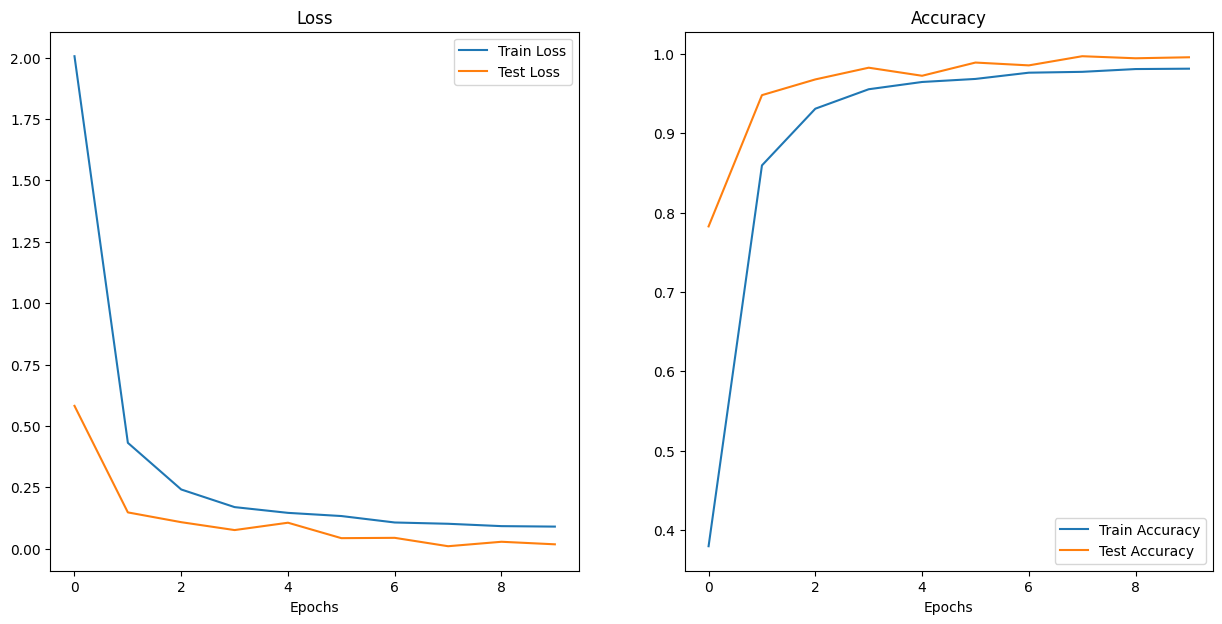

In [40]:
plot_loss_curves(results1)

In [41]:
model_path=Path("/kaggle/working/models")
model_path.mkdir(parents=True,exist_ok=True)

model_name="Sign Language Model_LeNet_Try8.pth"
model_save_path=model_path/model_name

print("Saving model to:",model_save_path)
torch.save(obj=model1.state_dict(),
           f=model_save_path)

Saving model to: /kaggle/working/models/Sign Language Model_LeNet_Try8.pth


In [42]:
def load_model(model_path):
    with torch.no_grad():
        predictor=torchvision.models.googlenet()
        predictor.aux1=None
        predictor.aux2=None #LeNet
        predictor.fc=nn.Sequential(
            nn.Linear(in_features=1024,out_features=256),
            nn.Dropout(p=0.2),
            nn.Linear(in_features=256,out_features=29)
        )
        state_dict=torch.load(model_path,map_location="cpu")
        predictor.load_state_dict(state_dict)
        predictor.to(device)
        predictor.eval()
        return predictor

In [43]:
model=load_model("/kaggle/working/models/Sign Language Model_LeNet_Try8.pth")
model

/opt/conda/lib/python3.10/site-packages/torchvision/models/googlenet.py:47: FutureWarning: The default weight initialization of GoogleNet will be changed in future releases of torchvision. If you wish to keep the old behavior (which leads to long initialization times due to scipy/scipy#11299), please set init_weights=True.
  warnings.warn(


GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

In [44]:
def predict_letter(model,img):
    with torch.no_grad():
        img=img.unsqueeze(dim=0)
        gs=model(img)
        tags=torch.softmax(gs,dim=1)
        print(tags)
        tag=torch.argmax(tags,dim=1)
        return tag.item()

tensor([[5.1141e-36, 1.0669e-35, 3.6612e-41, 3.3410e-23, 1.9337e-38, 1.3126e-11,
         7.9675e-17, 3.6395e-13, 1.0518e-12, 1.0000e+00, 2.1220e-38, 2.0516e-36,
         8.3834e-20, 1.6412e-15, 1.5806e-36, 2.3336e-16, 1.5875e-33, 2.0330e-28,
         3.0520e-35, 5.6433e-31, 8.3169e-27, 2.5343e-27, 5.5559e-30, 1.2353e-28,
         2.6443e-08, 1.8616e-36, 4.1358e-32, 8.4262e-37, 1.1544e-12]],
       device='cuda:0')
tensor([[4.3458e-12, 1.1151e-17, 2.4981e-18, 2.0855e-15, 1.5804e-15, 2.8560e-17,
         3.9124e-19, 4.4961e-19, 5.4862e-22, 7.0031e-19, 4.0875e-15, 3.9119e-10,
         1.7192e-14, 1.2487e-14, 6.8016e-08, 5.1423e-14, 2.3873e-07, 4.8985e-21,
         8.8117e-11, 1.0000e+00, 4.7385e-18, 4.2820e-15, 3.2464e-14, 2.7822e-17,
         1.3541e-07, 1.4354e-08, 1.8209e-13, 1.1351e-16, 5.5491e-19]],
       device='cuda:0')
tensor([[5.2454e-05, 1.9638e-04, 1.2447e-04, 9.1469e-08, 3.0146e-06, 2.3041e-08,
         5.6718e-05, 2.8975e-03, 4.9083e-07, 1.4318e-04, 1.0292e-01, 2.9294e-04,


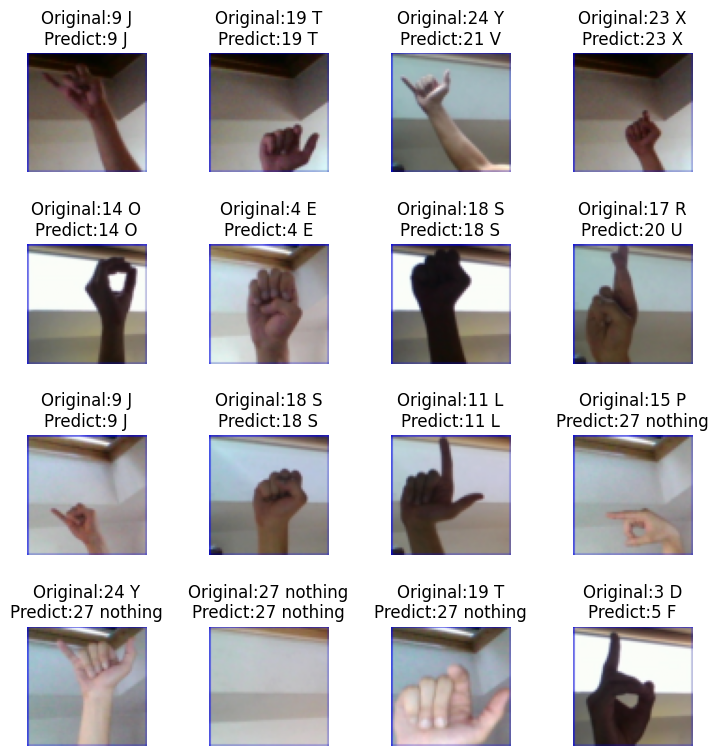

In [47]:
rows,cols=4,4
fig=plt.figure(figsize=(9,9))
plt.subplots_adjust(hspace=0.6)
for i in range(0,rows*cols):
    idx=torch.randint(0,len(test_data),size=[1]).item()
    img,label=test_data[idx]
    fig.add_subplot(rows,cols,i+1)
    tag=predict_letter(model,img.to(device))
    plt.imshow(img.permute(1,2,0))
    plt.axis(False) 
    plt.title("Original:"+str(label)+" "+labels[label]+"\nPredict:"+str(tag)+" "+labels[tag])